# Simple Linear Regression with Numpy

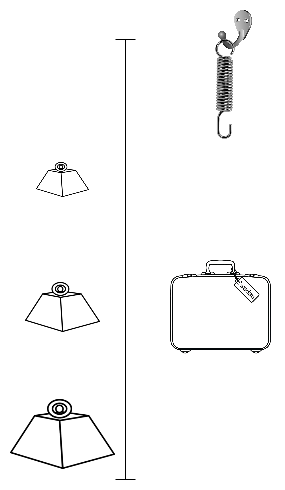

In [1]:
import numpy as np

In [2]:
x = np.arange(0.0, 15.0, 0.1)

In [3]:
x

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
        10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
        11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
        12.6,  12.7,

In [4]:
m = 1.0

In [5]:
c = 5.0

In [6]:
y = (m * x) + c

In [7]:
y

array([  5. ,   5.1,   5.2,   5.3,   5.4,   5.5,   5.6,   5.7,   5.8,
         5.9,   6. ,   6.1,   6.2,   6.3,   6.4,   6.5,   6.6,   6.7,
         6.8,   6.9,   7. ,   7.1,   7.2,   7.3,   7.4,   7.5,   7.6,
         7.7,   7.8,   7.9,   8. ,   8.1,   8.2,   8.3,   8.4,   8.5,
         8.6,   8.7,   8.8,   8.9,   9. ,   9.1,   9.2,   9.3,   9.4,
         9.5,   9.6,   9.7,   9.8,   9.9,  10. ,  10.1,  10.2,  10.3,
        10.4,  10.5,  10.6,  10.7,  10.8,  10.9,  11. ,  11.1,  11.2,
        11.3,  11.4,  11.5,  11.6,  11.7,  11.8,  11.9,  12. ,  12.1,
        12.2,  12.3,  12.4,  12.5,  12.6,  12.7,  12.8,  12.9,  13. ,
        13.1,  13.2,  13.3,  13.4,  13.5,  13.6,  13.7,  13.8,  13.9,
        14. ,  14.1,  14.2,  14.3,  14.4,  14.5,  14.6,  14.7,  14.8,
        14.9,  15. ,  15.1,  15.2,  15.3,  15.4,  15.5,  15.6,  15.7,
        15.8,  15.9,  16. ,  16.1,  16.2,  16.3,  16.4,  16.5,  16.6,
        16.7,  16.8,  16.9,  17. ,  17.1,  17.2,  17.3,  17.4,  17.5,
        17.6,  17.7,

In [8]:
import matplotlib.pyplot as pl

In [9]:
pl.plot(x, y)

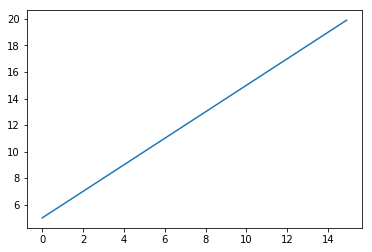

In [10]:
pl.show()

In [11]:
noise = np.random.normal(0.0, 1.0, x.size)

In [12]:
noise

array([  5.54329470e-01,  -5.98037997e-01,  -1.07492694e-01,
        -4.53239635e-01,   2.57232937e+00,   1.94740258e+00,
        -2.05450341e-01,  -8.26763015e-03,  -8.05982478e-01,
         7.26878786e-01,   3.68172132e-01,   3.34458138e-01,
        -5.08112080e-01,   1.10992416e-01,  -1.42342043e+00,
        -1.60237617e+00,   7.19913208e-01,   1.63396308e+00,
         1.64341214e+00,   5.79940978e-01,   1.00459876e-01,
        -6.91600943e-01,  -5.05058259e-01,  -9.67480894e-02,
        -5.64921320e-01,  -1.29235159e+00,  -2.11383672e+00,
        -1.17339069e-01,   2.38571314e-01,  -1.09385382e-01,
         2.59252800e-01,   1.50965125e-01,   1.46084947e-01,
        -3.66605094e-01,   4.47258631e-01,  -1.51058508e+00,
        -2.19997773e+00,  -5.75624156e-01,  -4.60051791e-02,
         1.91087490e-01,  -2.25594065e+00,  -5.32930869e-01,
        -3.25602481e-01,   9.89281524e-01,  -8.04031688e-01,
        -4.45507985e-01,  -1.13412669e+00,   7.71314844e-01,
        -3.41969580e+00,

In [13]:
pl.plot(noise, '.')

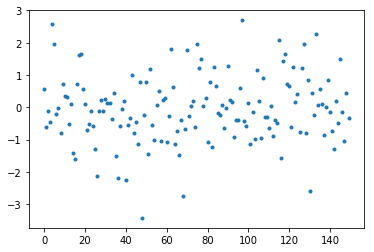

In [14]:
pl.show()

In [15]:
y_meas = y + noise

In [16]:
pl.plot(x, y_meas, '.')

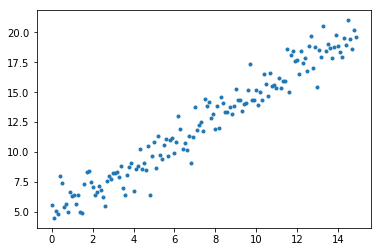

In [17]:
pl.show()

In [18]:
x_avg = np.mean(x)
y_avg = np.mean(y_meas)

x_norm = x - x_avg
y_norm = y_meas - y_avg

m_est = np.sum(x_norm * y_norm) / np.sum(x_norm * x_norm)
c_est = y_avg - m_est * x_avg

In [19]:
m_est, c_est

(1.0196947645944934, 4.8125991944982172)

In [20]:
y_est = (m_est * x) + c

In [21]:
r_sq = 1 - np.sum((y_meas - y_est)**2) / np.sum(y_norm**2)
r_sq

0.94656611673321933

#### End